## Notebook on "Social media"

Prepared by [**beatrizq**](beatriz.querido@gmail.com) ([**Eurostat**](https://ec.europa.eu/eurostat), Methodology & Innovation unit B.1).

This notebook aims at illustrating the *Statistics Expplained* article on [Social media - statistics on the use by enterprises](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Social_media_-_statistics_on_the_use_by_enterprises).

In [1]:
#EUROSTATAPICLIENT

#install modules
#pip install jsonstat.py
#pip install eurostatapiclient --no-dependencies

#import libraries
import numpy as np
import pandas as pd
import requests
import certifi
import chardet
import idna
import pytz
import six
import urllib3
import dateutil
from eurostatapiclient import EurostatAPIClient

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#adjust settings for EurostatAPIClient
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

## Use of social media by enterprises
Table 1: Enterprises using social media, 2019, (% of enterprises) - Source: Eurostat ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

## Types of social media used over time (2013-2019)

In [3]:
#FIGURE 1: data

#source: isoc_cismt

#get data
figure1a_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM_BLOG&indic_is=E_SM_CNTSHR&indic_is=E_SM_SNET&indic_is=E_SM_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1a = client.get_dataset(figure1a_source).to_dataframe()

figure1b_source = 'isoc_cismt?groupedIndicators=1&precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013&time=2015&time=2017&time=2019'
dataframe_figure1b = client.get_dataset(figure1b_source).to_dataframe()

dataframe_figure1 = dataframe_figure1a.copy().fillna(dataframe_figure1b)
#dataframe_figure1.at[0,'values'] = 10

dataframe_figure1_blog = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_BLOG'].groupby(by = 'time')['values'].sum()
dataframe_figure1_cntshr = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_CNTSHR'].groupby(by = 'time')['values'].sum()
dataframe_figure1_snet = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_SNET'].groupby(by = 'time')['values'].sum()
dataframe_figure1_wiki = dataframe_figure1.loc[dataframe_figure1['indic_is'] == 'E_SM_WIKI'].groupby(by = 'time')['values'].sum()



Text(0, 1.05, 'Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)')

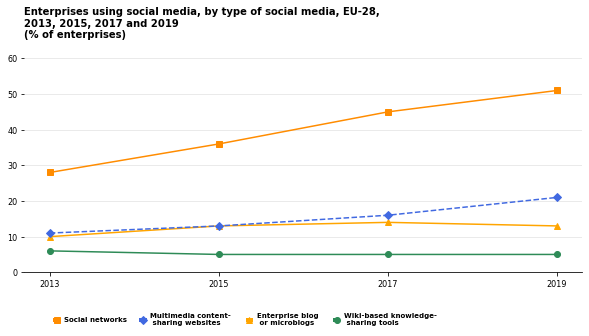

In [4]:
#FIGURE 1: graph

#size of graph
fig, ax = plt.subplots(figsize=(10, 4))

#grid
plt.style.use('default') #aesthetic of sheet
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.tick_params(axis = 'both',which = 'major' , labelsize = 8) #size of labels in axis

#scale of graph
plt.ylim(0,61)
plt.yticks(np.arange(0, 61, step=10))

#plot the data
plt.plot(dataframe_figure1_blog, color='orange', marker ='^')
plt.plot(dataframe_figure1_cntshr, color='royalblue', marker ='D', linestyle = 'dashed')
plt.plot(dataframe_figure1_snet, color='darkorange', marker ='s')
plt.plot(dataframe_figure1_wiki, color='seagreen', marker ='o')

#legend
leg_snet = Line2D([0],[0], lw=4, color='darkorange', label='Social networks', marker='s')
leg_cntshr = Line2D([0],[0], lw=4, color='royalblue', label='Multimedia content- \n sharing websites', marker='D')
leg_blog = Line2D([0],[0], lw=4, color='orange', label='Enterprise blog \n or microblogs', marker='^')
leg_wiki = Line2D([0],[0], lw=4, color='seagreen', label='Wiki-based knowledge- \n sharing tools', marker='o')

leg = ax.legend(handles=[leg_snet,leg_cntshr,leg_blog,leg_wiki], frameon=False, loc=(0.05, -.26), ncol=4, prop={'weight':'bold','size':'7'}, labelspacing=0.1, handlelength=0.5)

#title
ax.set_title('Enterprises using social media, by type of social media, EU-28, \n2013, 2015, 2017 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)

Figure 1: Enterprises using social media, by type of social media, EU-28, 2013, 2015, 2017 and 2019 (% of enterprises)  - Source: Eurostat ([isoc_cismt](https://www.coursera.org/specializations/deep-learning#courses))

In [5]:
#FIGURE 2: data

countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia','SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28', 'TR':'Turkey','CH':'Switzerland', 'IS':'Iceland', 'MK':'North Macedonia','ME':'Montenegro',
'NO':'Norway', 'RS': 'Serbia'}

#get data
figure2_2013_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2013'
dataframe_figure2_2013 = client.get_dataset(figure2_2013_source).to_dataframe()

figure2_2019_source = 'isoc_cismt?precision=1&geo=AT&geo=BE&geo=BG&geo=CY&geo=CZ&geo=DE&geo=DK&geo=EE&geo=EL&geo=ES&geo=EU28&geo=FI&geo=FR&geo=HR&geo=HU&geo=IE&geo=IS&geo=IT&geo=LT&geo=LU&geo=LV&geo=MT&geo=NL&geo=NO&geo=PL&geo=PT&geo=RO&geo=SE&geo=SI&geo=SK&geo=UK&unit=PC_ENT&indic_is=E_SM1_SNET&sizen_r2=10_C10_S951_XK&unitLabel=label&time=2019'
dataframe_figure2_2019 = client.get_dataset(figure2_2019_source).to_dataframe()

#organize 2019 layer
dataframe_figure2_2019_eu28 = dataframe_figure2_2019[dataframe_figure2_2019['geo'] == 'EU28']

dataframe_figure2_2019_onlyEU = dataframe_figure2_2019[(dataframe_figure2_2019.geo != 'NO') & (dataframe_figure2_2019.geo != 'IS') & (dataframe_figure2_2019.geo != 'EU28')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_notEU = dataframe_figure2_2019[(dataframe_figure2_2019['geo'] == 'NO') | (dataframe_figure2_2019['geo'] == 'IS')].sort_values(by = ['values'],ascending = False)

dataframe_figure2_2019_sorted = pd.concat([dataframe_figure2_2019_eu28, dataframe_figure2_2019_onlyEU, dataframe_figure2_2019_notEU], ignore_index=False).reset_index()

#organize 2013 layer
dataframe_figure2_2013_sorted = dataframe_figure2_2013.set_index('geo')
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reindex(index=dataframe_figure2_2019_sorted['geo'])
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.reset_index()

#replace names
dataframe_figure2_2013_sorted = dataframe_figure2_2013_sorted.replace({'geo':countries_names})
dataframe_figure2_2019_sorted = dataframe_figure2_2019_sorted.replace({'geo':countries_names})

Text(0, 1.05, 'Enterprises using social networks, 2013 and 2019 \n(% of enterprises)')

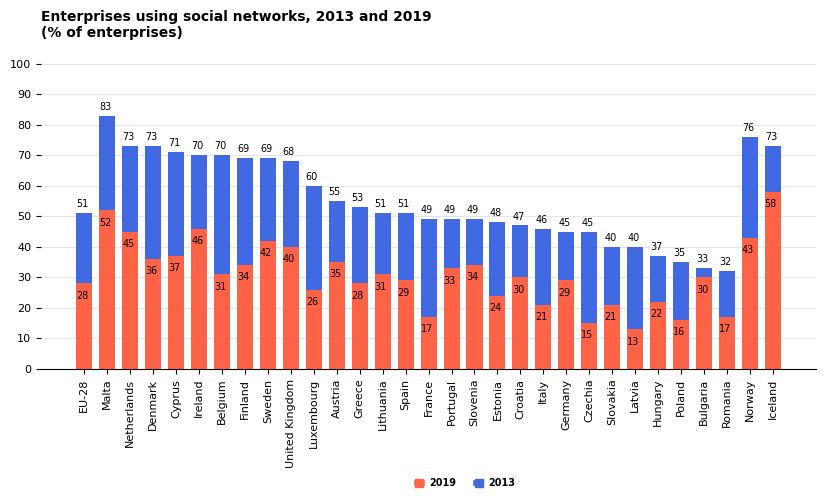

In [13]:
#FIGURE 2: graph

figure2_bars_2019 = dataframe_figure2_2019_sorted['values'].tolist()
figure2_bars_2013 = dataframe_figure2_2013_sorted['values'].tolist()
figure2_bars_2019_dif = [a - b for a,b in zip(figure2_bars_2019,figure2_bars_2013)]
figure2_countries = dataframe_figure2_2019_sorted['geo'].tolist()
r = range(len(figure2_countries))
figure2_years = ['2013','2019']
colors = ['tomato', 'royalblue']
#figure2_values = [figure2_bars_2013,figure2_bars_2019]

#plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, figure2_countries, rotation= 90) #x labels
ax.set_ylim(0, 101)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 101, step=10))

barWidth = 0.7
#ax.set_ylim(0, 101)
#plt.bar(r, figure2_bars_2013, color=colors[0], width=barWidth, label=figure2_years[0])
bars_2013 = plt.bar(r, figure2_bars_2013, color=colors[0], width=barWidth, label=figure2_years[0])

bars_2019 = plt.bar(r, figure2_bars_2019_dif, bottom=figure2_bars_2013, color=colors[1], width=barWidth, label=figure2_years[1])

for bar_2013, bar_2019 in zip(bars_2013,bars_2019):
    h_2013 = bar_2013.get_height()
    h_2019 = bar_2019.get_height()
    x_2013 = bar_2013.get_x()
    x_2019 = bar_2019.get_x()
    x = x_2013 + x_2019
    h = h_2013 + h_2019
    plt.text(x_2019, h + 2, h, fontsize='x-small')
    plt.text(x_2013, h_2013 - 5, h_2013, fontsize='x-small')

#title
ax.set_title('Enterprises using social networks, 2013 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)

#legend
leg_2019 = Line2D([0],[0], lw=4, color='tomato', label='2019', marker='s')
leg_2013 = Line2D([0],[0], lw=4, color='royalblue', label='2013', marker='s')

leg = ax.legend(handles=[leg_2019,leg_2013], frameon=False, loc=(0., -.4), ncol=2, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)

ax.set_title('Enterprises using social networks, 2013 and 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)


In [10]:
#FIGURE 3: data

#get data
figure3_source = 'isoc_cismt?precision=1&geo=EU28&unit=PC_ENT&indic_is=E_SM1_BLOG&indic_is=E_SM1_CNTSHR&indic_is=E_SM1_SNET&indic_is=E_SM1_WIKI&sizen_r2=L_C10_S951_XK&sizen_r2=M_C10_S951_XK&sizen_r2=S_C10_S951_XK&unitLabel=label&time=2019'

dataframe_figure3 = client.get_dataset(figure3_source).to_dataframe()

#dataframe_figure3_pivot = dataframe_figure3[['values','indic_is','sizen_r2']].pivot("indic_is", "sizen_r2", "values")


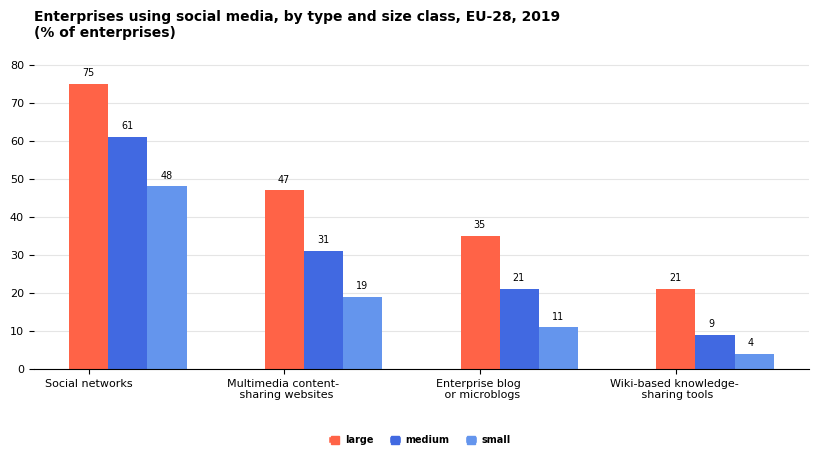

In [24]:
#FIGURE 3: graph

figure3_bars_large = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'L_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()

figure3_bars_medium = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'M_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()

figure3_bars_small = dataframe_figure3[(dataframe_figure3['sizen_r2'] == 'S_C10_S951_XK')].sort_values(by = ['values'],ascending = False)['values'].tolist()

media_types = ['Social networks','Multimedia content- \n sharing websites','Enterprise blog \n or microblogs','Wiki-based knowledge- \n sharing tools']

sizes = ['large','medium','small']

colors = ['tomato', 'royalblue', 'cornflowerblue']

r = np.arange(len(media_types))

fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True, which = 'major', axis = 'y', color ='grey', linestyle = '-', alpha = 0.2) #grey lines
sns.despine(top=True, right=True, left=True, bottom=False) #remove spines
ax.set_axisbelow(True) #set the grid below the bars
plt.xticks(r, media_types, rotation= 0) #x labels
ax.set_ylim(0, 81)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8) #size of labels in axis
plt.yticks(np.arange(0, 81, step=10))
barWidth = 0.2 #width of bars

bars_large = plt.bar(r, figure3_bars_large, color=colors[0], width=barWidth, label=sizes[0])

bars_medium = plt.bar(r + barWidth, figure3_bars_medium, color=colors[1], width=barWidth, label=sizes[1])

bars_small = plt.bar(r + barWidth*2, figure3_bars_small, color=colors[2], width=barWidth, label=sizes[2])

"""
for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

"""
for bars_large, bars_medium, bars_small in zip(bars_large,bars_medium,bars_small):
    h_large = bars_large.get_height()
    h_medium = bars_medium.get_height()
    h_small = bars_small.get_height()
    x_large = bars_large.get_x()
    x_medium = bars_medium.get_x()
    x_small = bars_small.get_x()
    plt.text(x_large + barWidth/3, h_large +2, h_large, fontsize='x-small')
    plt.text(x_medium + barWidth/3, h_medium +2, h_medium, fontsize='x-small')
    plt.text(x_small + barWidth/3, h_small +2, h_small, fontsize='x-small')

#title
ax.set_title('Enterprises using social media, by type and size class, EU-28, 2019 \n(% of enterprises)', fontsize=10, fontweight='bold', horizontalalignment = 'left', x = 0, y =1.05)

#legend
leg_large = Line2D([0],[0], lw=4, color='tomato', label='large', marker='s')
leg_medium = Line2D([0],[0], lw=4, color='royalblue', label='medium', marker='s')
leg_small = Line2D([0],[0], lw=4, color='cornflowerblue', label='small', marker='s')

leg = ax.legend(handles=[leg_large,leg_medium,leg_small], frameon=False, loc=(0.38, -.26), ncol=3, prop={'weight':'bold','size':'7'}, labelspacing=0.5, handlelength=0.5)



In [ ]:
#FIGURE 4: data

